### What is a Term Deposit?
A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution.  Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits. 
From investopedia:https://www.investopedia.com/terms/t/termdeposit.asp

**1 - age:** (numeric)<br>
**2 - job:** type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
**3 - marital:** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
**4 - education:** (categorical: primary, secondary, tertiary and unknown)<br>
**5 - default:** has credit in default? (categorical: 'no','yes','unknown')<br>
**6 - housing:** has housing loan? (categorical: 'no','yes','unknown')<br>
**7 - loan:** has personal loan? (categorical: 'no','yes','unknown')<br>
**8 - balance:** Balance of the individual.<br>
**9 - contact:** contact communication type (categorical: 'cellular','telephone') <br>
**10 - month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
**11 - day:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
**12 - duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.<br>
**13 - campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
**14 - y** - has the client subscribed a term deposit? (binary: 'yes','no')

### CONTENT LIST :

**A. Attribute Descriptions:**<br>
 1.*[Exploring the Data](#Exploring_the_Data)<br>

**B. Structuring The Data:**<br>
 1.*[Overall Anlysis](#Overall_Analysis)<br>
 2.*[Data Structuring](#Data_Structuring)<br>
 3.*[Exploratory Anaşysis](#Exploratory_Analysis)<br>




## Attribute Descriptions:
   1.*[Exploring the Data](#Exploring_Data)

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [322]:
import warnings

warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)

In [323]:
df = pd.read_csv(r'D:\Continuum-Improovement\Work_case\term-deposit-marketing-2020.csv')

## DataSet Load

In [5]:
#f, ax = plt.subplots(figsize = (10,8)           
#sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2g', )

In [324]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [325]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [326]:
df.job = pd.Categorical(df.job)
df.marital = pd.Categorical(df.marital)
df.education = pd.Categorical(df.education)
df.housing = pd.Categorical(df.housing)
df.loan = pd.Categorical(df.loan)
df.contact = pd.Categorical(df.contact)
df.month = pd.Categorical(df.month)
df.default = pd.Categorical(df.default)

In [327]:
df.dtypes # I converted the object-data-types to category to define them to Python as category.

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
y              object
dtype: object

## Descriptional Side:

In [328]:
df.shape

(40000, 14)

In [329]:
df.columns  # Here I would like to see the all features names.

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

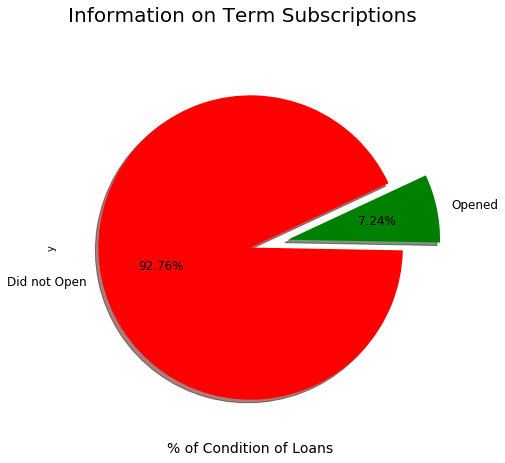

In [332]:
f , ax = plt.subplots(1,figsize = (9,7))
colors = ['red', 'green']
labels = "Did not Open", "Opened"
plt.suptitle('Information on Term Subscriptions', fontsize = 20)
df["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax, shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25);
# ax[0].set_title('State of Loan', fontsize=16)
ax.set_xlabel('% of Condition of Loans', fontsize=14);



That Pie chart shows us, "Term-deposite opened & did not opened"<br>
Opened : 7.24 %<br>
Did not opened : 92.76 %<br>

In [208]:
df1 = df.copy() # I did copy the 'df' to keep one original copy if it might be necessary.

In [335]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,no


Above, on the table I see great amount of 'unknown'. I would like to keep them as 'NaN' at first. Then <br> probably I will aggregate them around threshold value.

In [336]:
df.describe().T # Results,before detecting missing value and other preprocessing process.

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


**1.balance**here we can say from the table that there are some minus balance owners in our bank<br>
**2.age**mean age is 40 our mostl target age cluster probably will be that might be between 30 and 50 years old people<br>
**3.day**our customers avarage day of the month is middle of the months to sell their term deposits<br>
**4.duration**avarage duration of term deposit is 254  days and its standard daviation is 259 that means the duration might be between 250<br> and 500 days<br> 
**5.Campaign**campaing is the categoric and yes/no answers that's why it will not be able to assess.

## Missing Values :

In [337]:
df1.isnull().sum() # As you see here... There is nothing but unknown values. that's why we can not see the NaN values.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [338]:
df1.replace('unknown', np.NaN, inplace = True) 

 Replaced them with the NaN values. Now we can detect and understand the weight of the NaN values on their own columns.

In [339]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#####  Missing Value Rates :

In [340]:
cont_nan_rate = ((df1['contact'].isnull().values.sum())/((df1['contact'].isnull().values.sum()) 
                 + (df1['contact'].notnull().values.sum())))*100
print("'contact' -  missing value rate  :",cont_nan_rate)


edu_nan_rate = ((df1['education'].isnull().values.sum())/((df1['education'].isnull().values.sum()) 
                 + (df1['education'].notnull().values.sum())))*100
print("'education' -  missing value rate  :",edu_nan_rate)


job_nan_rate = ((df1['job'].isnull().values.sum())/((df1['job'].isnull().values.sum()) 
                 + (df1['job'].notnull().values.sum())))*100
print("'job' -  missing value rate  :",job_nan_rate)

'contact' -  missing value rate  : 0.0
'education' -  missing value rate  : 0.0
'job' -  missing value rate  : 0.0


With this result, we can say that we do not need to erase whole column.<br>
Because their rates are not above the 50 % or more. Only the 'Contact' column has 31 %, others have very small rates to do something.<br>
I may replace the NaN values with the median value of its own column.

###### here I will be changing the all missing values with their median values.

In [341]:
#replaced the NaN values with the median of the variables.
df1.job.fillna(df1.job.mode()[0], inplace = True)
df1.education.fillna(df1.education.mode()[0], inplace = True)
df1.contact.fillna(df1.contact.mode()[0], inplace =True)

In [224]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

## Categoric Values Summary :

checking the categoric variables classes and number of classes

In [342]:
cat_class = {'job':df1['job'].value_counts().count(),
             'marital':df1['marital'].value_counts().count(),
             'education':df1['education'].value_counts().count(),
             'defoult':df1['default'].value_counts().count(),
             'housing':df1['housing'].value_counts().count(),
             'loan':df1['loan'].value_counts().count(),
             'contact':df1['contact'].value_counts().count(),
             'month':df1['month'].value_counts().count()}# consists of 10 category
print('Names/Classes : ', cat_class)

Names/Classes :  {'job': 11, 'marital': 3, 'education': 3, 'defoult': 2, 'housing': 2, 'loan': 2, 'contact': 2, 'month': 11}


### Visualization :

##### JOB

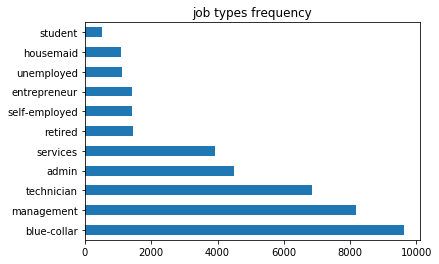

In [343]:
df1['job'].value_counts().plot.barh().set_title('job types frequency');

Mostly our customers consist of blue-collars. And if we want to sort them as top 5 we can say:<br>
**1.** Blue-Collar<br>
**2.** Management<br>
**3.** Technicians<br>
**4.** Admins<br>
**5.** Services<br>

Also we can understand from this graph that, great amount of our term deposite customers consist of middile income groups.

Housemaids, students, entrepreneurs, self-employed people and retireds they are not exactly buying this product.<br>
That's why they will be our focus groups for term-deposit campaign.

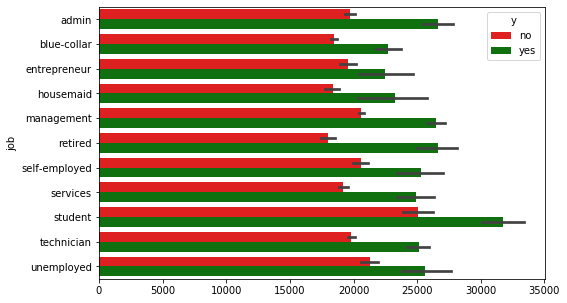

In [344]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df1.job.index, y = df1.job, data = df1, palette = palette, hue = 'y')

As I wroted above, our focus group maight be Housemaids, students entrepreneurs, self-employed perople and retireds.<br>
Seemingly, especially the student group has the higher tendency to buying term-deposit.<br>

#### EDUCATION

Education plot shows us that, when the educational level is getting higher, also tendency of making saving is also getting higher.<br>
Also we can say from this conclusion that, students are also our potential customers. We can start a campaign also for them.<br> Maybe special offers for the university students, might be more effective.


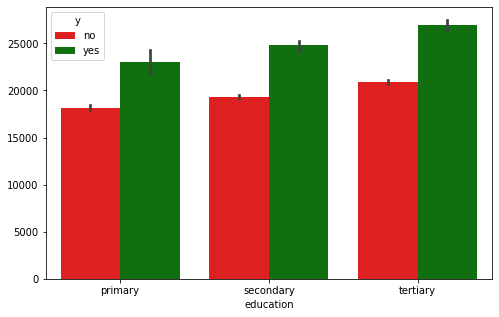

In [345]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df1.education, y = df1.education.index, data = df, palette = palette, hue = 'y')

##### MARITAL

Acording to plot below marital status doesn't show us clearly if there is a certain situation.

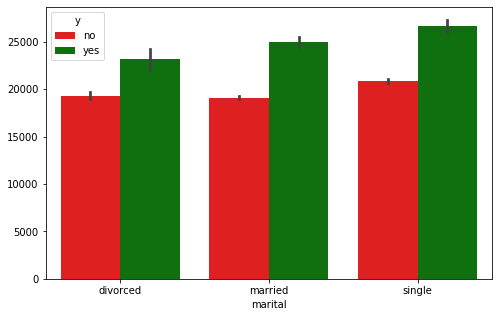

In [346]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = df.marital, y = df.marital.index, data = df, palette = palette, hue = 'y')

#### DURATION

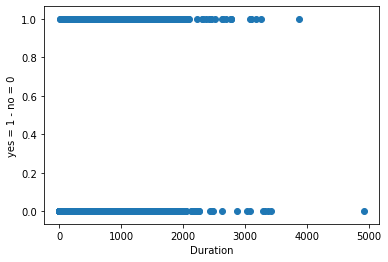

Max- duration for phone call:  4918
Min- duration for phone call:  0
Mean- duration for phone call:  254.8243
Mode- duration for phone call:  124


In [347]:
palette = ['red','green']
plt.scatter(x = df1.duration, y = df_target);
plt.xlabel('Duration')
plt.ylabel('yes = 1 - no = 0')
plt.show()
print('Max- duration for phone call: ', df1.duration.max())
print('Min- duration for phone call: ', df1.duration.min())
print('Mean- duration for phone call: ', df1.duration.mean())
print('Mode- duration for phone call: ', df1.duration.mode()[0])

Duration is the important featue for us because it is the time duration when we make a phone call.<br> It is really important because we can see from the plot that the customers do not prefer the long call durations.<br> That can make people annoying and the company might loose potential customers because of the redial frequency and its duration.

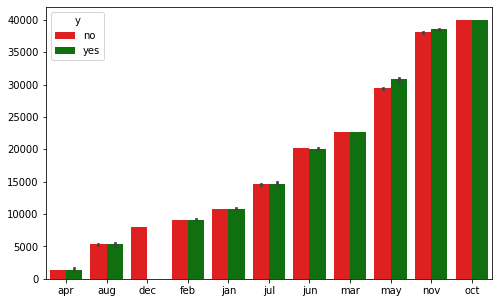

In [425]:
plt.subplots(figsize = (8,5))
palette = ['red','green']
sns.barplot(x = np.sort(df1.month), y = df.month.index, data = df, palette = palette, hue = 'y');

We observe from the table that there is a seasonal affect. In spring and autumn the customers tend to buy financial products.

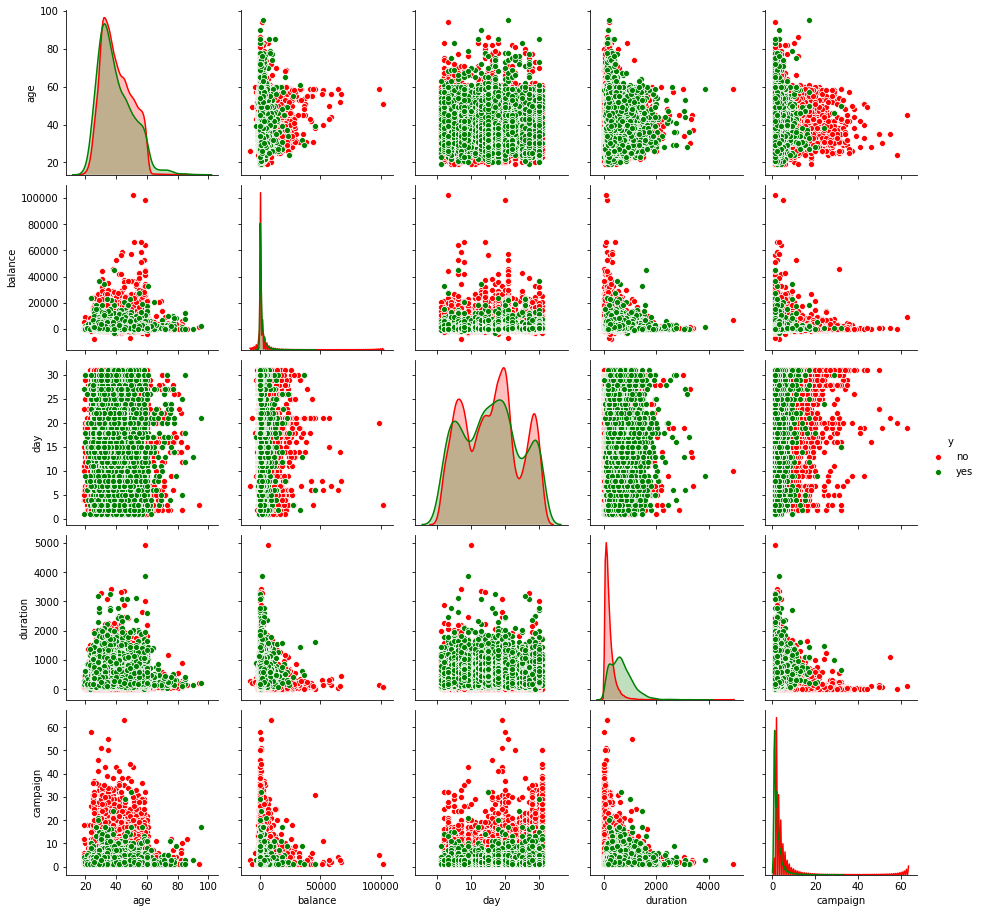

In [348]:
palette = ['red','green']
sns.pairplot(df1, hue = 'y',palette = palette);

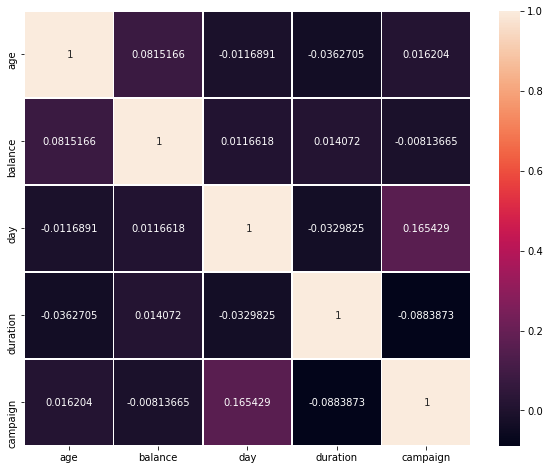

In [349]:
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df1.corr(), annot = True, linewidths = .5, fmt = '2g', ax = ax);

we can select the campaign instead of day

## Data Transform and feature selection

In [350]:
df1.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,no


In [351]:
df_cat = pd.DataFrame(df1.loc[:,['job','marital','education','default', 'housing', 'loan', 'contact', 'month']].values)

In [352]:
df_cat.columns = ['job','marital','education','default', 'housing', 'loan', 'contact', 'month']

In [353]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month
0,management,married,tertiary,no,yes,no,cellular,may
1,technician,single,secondary,no,yes,no,cellular,may
2,entrepreneur,married,secondary,no,yes,yes,cellular,may
3,blue-collar,married,secondary,no,yes,no,cellular,may
4,blue-collar,single,secondary,no,no,no,cellular,may


In [354]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cat.job = le.fit_transform(df_cat.job)
df_cat.marital = le.fit_transform(df_cat.marital)
df_cat.education = le.fit_transform(df_cat.education)
df_cat.default = le.fit_transform(df_cat.default)
df_cat.housing = le.fit_transform(df_cat.housing)
df_cat.loan = le.fit_transform(df_cat.loan)
df_cat.contact = le.fit_transform(df_cat.contact)
df_cat.month = le.fit_transform(df_cat.month)
df_cat.head()

,job,marital,education,default,housing,loan,contact,month
0,4,1,2,0,1,0,0,8
1,9,2,1,0,1,0,0,8
2,2,1,1,0,1,1,0,8
3,1,1,1,0,1,0,0,8
4,1,2,1,0,0,0,0,8


In [355]:
df_target = pd.DataFrame(df1.loc[:,'y'].values)
df_target.columns = ['y']
df_target.y = le.fit_transform(df_target.y)
df_target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [356]:
df_num = pd.DataFrame(df1.loc[:,['age', 'balance','day', 'duration','campaign']].values)
df_num.columns = ['age', 'balance','day', 'duration','campaign']
df_num.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


In [357]:
df2 = pd.concat([df_cat,df_num], axis = 1)
df3 = pd.concat([df2,df_target], axis = 1)
df2.head()

,job,marital,education,default,housing,loan,contact,month,age,balance,day,duration,campaign
0,4,1,2,0,1,0,0,8,58,2143,5,261,1
1,9,2,1,0,1,0,0,8,44,29,5,151,1
2,2,1,1,0,1,1,0,8,33,2,5,76,1
3,1,1,1,0,1,0,0,8,47,1506,5,92,1
4,1,2,1,0,0,0,0,8,33,1,5,198,1


#### Feature Selection Test Before Threshold :

C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy without selecting features: 0.932
Classification accuracy after univariate feature selection: 0.932


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


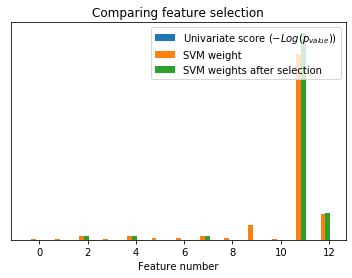

In [358]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC


x_train, x_test, y_train, y_test = train_test_split(df2,df_target, stratify = df_target, random_state = 0 )

df2_indices = np.arange(df2.shape[-1])

selector = SelectKBest(f_classif, k=5)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(df2_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')


clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(x_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(x_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(df2_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=5), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(x_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(x_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(df2_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

Classification accuracy without selecting features: 0.932<br>
Classification accuracy after univariate feature selection: 0.932<br>

I choose the variables depend on the SVM weights<br>
That's why the variable will be the 12th,11th, 9th, 7th, 4th and 2nd variables

In [359]:
df1.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,no


## Threshold Detection & Fullfilling:

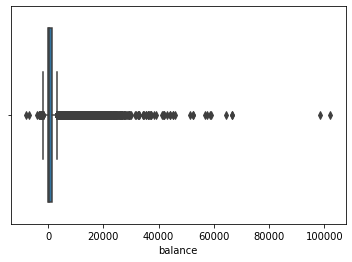

In [361]:
df2_duration = df2.duration
sns.boxplot(x = df2.balance);

In [360]:
Q1 = df2_duration.quantile(0.25)
Q3 = df2_duration.quantile(0.75)
IQR = Q3 - Q1 #inter Quantile we calculate the treshold value by using this IQR result

In [362]:
print('Q1', Q1)
print('Q3', Q3)
print('IQR', IQR)

Q1 100.0
Q3 313.0
IQR 213.0


In [363]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df2_duration < lower_limit

print('lower limit:',lower_limit)
print('upper limit:',upper_limit)

lower limit: -219.5
upper limit: 632.5


In [364]:
#threshold querying. Let us see if there is any values out of upper-lower limit values and how to reach them to see:

(df2_duration < lower_limit) | (df2_duration> upper_limit) #this created us a vector called threshold value True-False vector.
#That helps us to see the threshold values as True and the others will be False which are between the upper-lower bounds

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Name: duration, Length: 40000, dtype: bool

In [365]:
t_TF = (df2_duration < lower_limit)

t_TF.head()

0    False
1    False
2    False
3    False
4    False
Name: duration, dtype: bool

In [366]:
from sklearn.neighbors import LocalOutlierFactor

In [367]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf # this 'clf' contains figural features of LOF (Local Outlier Factor)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

In [368]:
# now I will start the algorithm: Note: if there are any string or object type values, it will not work you have to convert the values by using label encoder and one hot encoder
clf.fit_predict(df2)

array([1, 1, 1, ..., 1, 1, 1])

In [369]:
df_sc = clf.negative_outlier_factor_

In [370]:
# we want to sort them to see the gap value to indicating the outlier limit. 
# Here, -6,17722 will be the best value to define it because of a sudden jump to lower values. its index is [2]
np.sort(df_sc)[0:20]

array([-11.40279566,  -9.23725961,  -6.17722218,  -4.45076335,
        -4.42710174,  -4.15556702,  -3.23572519,  -3.13427695,
        -3.05684499,  -2.77718959,  -2.75514509,  -2.62020778,
        -2.61214803,  -2.57425829,  -2.51410481,  -2.509526  ,
        -2.47523682,  -2.46333494,  -2.43462427,  -2.42257652])

In [371]:
# threshold value:
t_value = np.sort(df_sc)[2] # we will accept that as a threshold value.

#### df_sc : it is our score table which is created by using LocalOutlierFactor : df_sc = clf.negative_otlier_factor_
#### t_value: it is our print value which will be used for filling instead of the threshold value

In [372]:
df2[df_sc == t_value]

,job,marital,education,default,housing,loan,contact,month,age,balance,day,duration,campaign
24148,9,1,2,0,1,0,1,9,59,6573,10,4918,1


In [373]:
anomal_tf = df_sc > t_value

print_value = df2[df_sc == t_value] # We have defined the print values which will be written instead of the threshold values
anomalous = df2[~anomal_tf] # anomalous defines the true-false format threshold values array.<

anomal_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [374]:
res = anomalous.to_records(index = False)  # here we erased their indexes to reunion them again. that's why we defined the printing values. 
res[:] = print_value.to_records(index = False)

In [375]:
df2[~anomal_tf] # we have checked if there is any difference we made or not

,job,marital,education,default,housing,loan,contact,month,age,balance,day,duration,campaign
12909,1,2,1,1,0,1,0,5,26,-8019,7,299,3
15682,4,1,2,1,0,1,0,5,49,-6847,21,206,1
24148,9,1,2,0,1,0,1,9,59,6573,10,4918,1


In [376]:
df2[~anomal_tf] = pd.DataFrame(res, index = df2[~anomal_tf].index) # we changed them all.

In [377]:
df2[~anomal_tf] # checked again it is ok or not. and it is ok.

,job,marital,education,default,housing,loan,contact,month,age,balance,day,duration,campaign
12909,9,1,2,0,1,0,1,9,59,6573,10,4918,1
15682,9,1,2,0,1,0,1,9,59,6573,10,4918,1
24148,9,1,2,0,1,0,1,9,59,6573,10,4918,1


#### Feature Selection after Threshold :

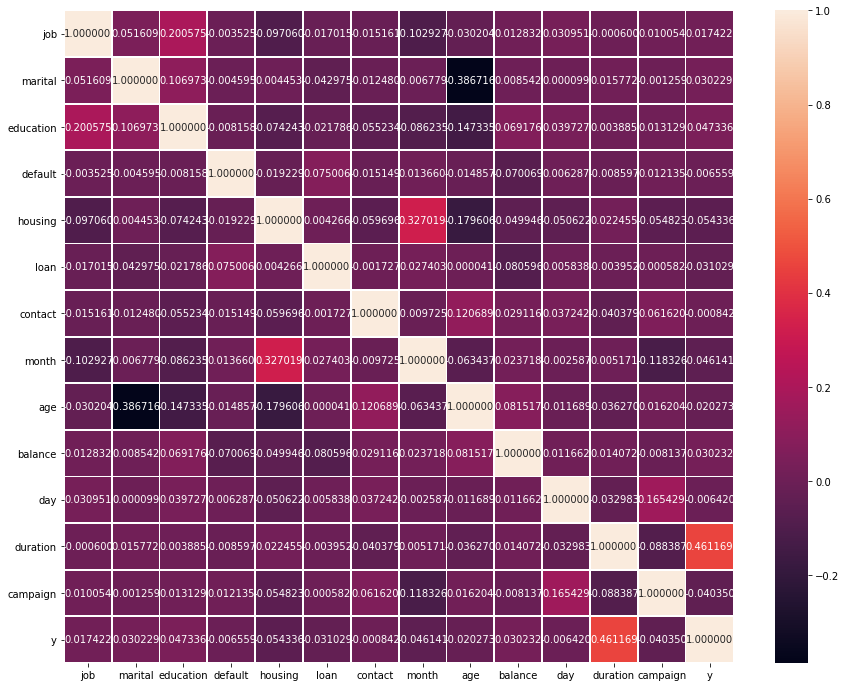

In [384]:
f, ax = plt.subplots(figsize = (15,12))
sns.heatmap(df3.corr(), annot = True, linewidths = .8, fmt = '2f', ax = ax);

Duration(0.46) - month(0.04) - housing(0.05) - education(0.47) - job<br>
They will be our model features.

In [385]:
df2_new = pd.DataFrame(df2.loc[:,['job','education','housing','month','duration']].values)
df2_new.columns = ['job','education','housing','month','duration']
df2_new.head()

,job,education,housing,month,duration
0,4,2,1,8,261
1,9,1,1,8,151
2,2,1,1,8,76
3,1,1,1,8,92
4,1,1,0,8,198


In [386]:
df2_new.shape

(40000, 5)

C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy without selecting features: 0.931
Classification accuracy after univariate feature selection: 0.932


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


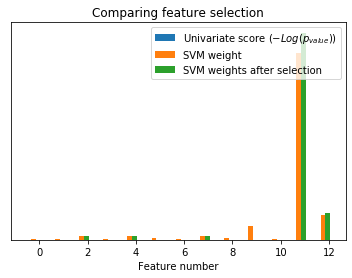

In [388]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC


x_train, x_test, y_train, y_test = train_test_split(df2,df_target, stratify = df_target, random_state = 0 )

df2_indices = np.arange(df2.shape[-1])

selector = SelectKBest(f_classif, k=5)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(df2_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')


clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(x_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(x_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(df2_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=5), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(x_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(x_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(df2_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')



plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

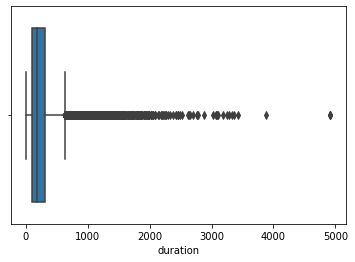

In [390]:
sns.boxplot(x = df2_new.duration); #now it seems better

In [391]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   job        40000 non-null  int64
 1   education  40000 non-null  int64
 2   housing    40000 non-null  int64
 3   month      40000 non-null  int64
 4   duration   40000 non-null  int64
dtypes: int64(5)
memory usage: 1.5 MB


## MODEL ESTIMATION

## Logistic Regression : 

In [392]:
df2_new.shape,df_target.shape

((40000, 5), (40000, 1))

In [393]:
X = df2.loc[:,['job','education','housing','month','duration']].values
df1.y = le.fit_transform(df1.y)
Y = df1.loc[:,'y'].values


In [394]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

[[7046  379]
 [ 262  313]]
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      7425
         1.0       0.45      0.54      0.49       575

    accuracy                           0.92      8000
   macro avg       0.71      0.75      0.73      8000
weighted avg       0.93      0.92      0.92      8000



C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


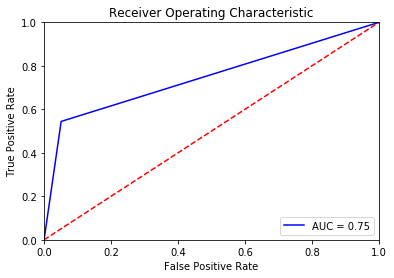

In [395]:
scaler = MinMaxScaler()

xlr_train,xlr_test,ylr_train,ylr_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

xlr_train = scaler.fit_transform(xlr_train)
xlr_test = scaler.fit_transform(xlr_test)
ylr_train = scaler.fit_transform(ylr_train.reshape(-1,1))
ylr_test = scaler.fit_transform(ylr_test.reshape(-1,1))

lgr = LogisticRegression(random_state = 0)
lgr.fit(xlr_train,ylr_train)

ylr_hat = lgr.predict(xlr_test)

#confussion matrix & classifying report:


c_m = confusion_matrix(ylr_test,ylr_hat)
print(c_m)
print(classification_report(ylr_test,ylr_hat))


fpr, tpr, threshold = metrics.roc_curve(ylr_test, ylr_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## KNeighbors Classification :

C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[[6806  619]
 [ 269  306]]
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      7425
         1.0       0.33      0.53      0.41       575

    accuracy                           0.89      8000
   macro avg       0.65      0.72      0.67      8000
weighted avg       0.92      0.89      0.90      8000



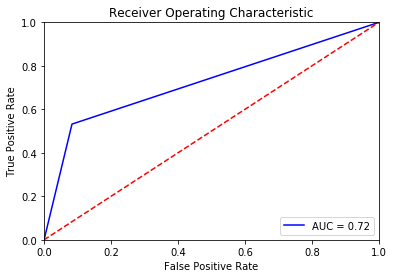

In [396]:
cls_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cls_KN.fit(xlr_train,ylr_train)

ykn_hat = cls_KN.predict(xlr_test)

con_mat = confusion_matrix(ylr_test,ykn_hat)
print(con_mat)
print(classification_report(ylr_test,ykn_hat))


fpr, tpr, threshold = metrics.roc_curve(ylr_test, ykn_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## Naive Bayes : 

C-M: [[6627  798]
 [ 178  397]]
              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93      7425
         1.0       0.33      0.69      0.45       575

    accuracy                           0.88      8000
   macro avg       0.65      0.79      0.69      8000
weighted avg       0.93      0.88      0.90      8000



C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


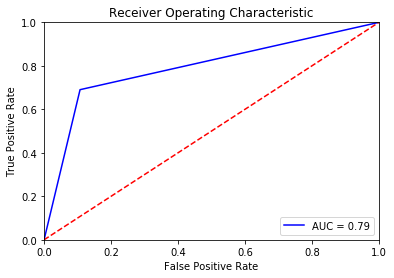

In [397]:
from sklearn.naive_bayes import GaussianNB

nb_G = GaussianNB()
nb_G.fit(xlr_train,ylr_train)

ynb_hat = nb_G.predict(xlr_test)

co_ma = confusion_matrix(ylr_test,ynb_hat)
print('C-M:', co_ma)
print(classification_report(ylr_test,ynb_hat))


fpr, tpr, threshold = metrics.roc_curve(ylr_test, ynb_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## Support Vector Machine :

C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[7425    0]
 [ 575    0]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      7425
         1.0       0.00      0.00      0.00       575

    accuracy                           0.93      8000
   macro avg       0.46      0.50      0.48      8000
weighted avg       0.86      0.93      0.89      8000



C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


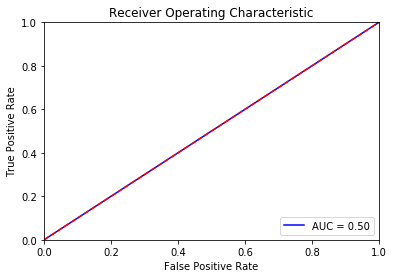

In [398]:
svc_c = SVC(kernel = 'rbf', random_state = 0, C = 1.0, degree = 3, gamma = 'auto')

svc_c.fit(xlr_train,ylr_train)
yvm_hat = svc_c.predict(xlr_test)

print(confusion_matrix(ylr_test,yvm_hat))
print(classification_report(ylr_test,yvm_hat))


fpr, tpr, threshold = metrics.roc_curve(ylr_test, yvm_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## Random Forest : 

C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RFC
c-m [[6718  707]
 [ 291  284]]
              precision    recall  f1-score   support

         0.0       0.96      0.90      0.93      7425
         1.0       0.29      0.49      0.36       575

    accuracy                           0.88      8000
   macro avg       0.62      0.70      0.65      8000
weighted avg       0.91      0.88      0.89      8000



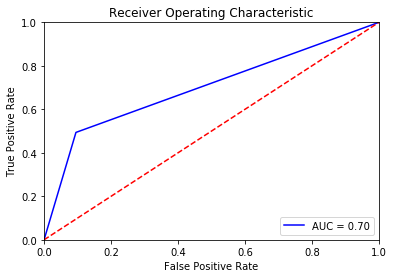

In [399]:
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(xlr_train,ylr_train)

yrfc_hat= rfc.predict(xlr_test)
cm = confusion_matrix(ylr_test,yrfc_hat)
print('RFC')
print('c-m',cm)
print(classification_report(ylr_test,yrfc_hat))



fpr, tpr, threshold = metrics.roc_curve(ylr_test, yrfc_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## Decission Trees :

[[6516  909]
 [ 295  280]]
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      7425
         1.0       0.24      0.49      0.32       575

    accuracy                           0.85      8000
   macro avg       0.60      0.68      0.62      8000
weighted avg       0.90      0.85      0.87      8000



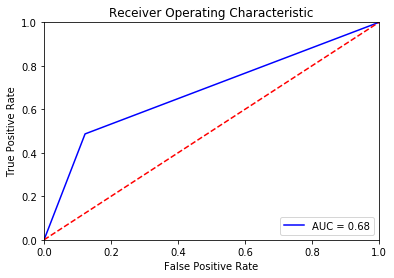

In [401]:
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(xlr_train,ylr_train)
ydtc_hat = dtc.predict(xlr_test)

print(confusion_matrix(ylr_test,ydtc_hat))
print(classification_report(ylr_test,ydtc_hat))



fpr, tpr, threshold = metrics.roc_curve(ylr_test, ydtc_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');

## TPR, FPR Values :

In [402]:
print('TPR:', tpr[1])
print('FPR: ', fpr[1])

TPR: 0.48695652173913045
FPR:  0.12242424242424242


## Artificaial Neural Networks :

In [403]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [404]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [405]:
import keras
from keras.models import Sequential
from keras.layers import Dense

C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", input_dim=5, kernel_initializer="uniform")`
  
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Epoch 1/50
32000/32000 [==============================] - 1s 32us/step - loss: 0.3382 - accuracy: 0.9268
Epoch 2/50
32000/32000 [==============================] - 1s 31us/step - loss: 0.2527 - accuracy: 0.9275
Epoch 3/50
32000/32000 [==============================] - 1s 33us/step - loss: 0.2361 - accuracy: 0.9275
Epoch 4/50
32000/32000 [==============================] - 1s 27us/step - loss: 0.2110 - accuracy: 0.9275
Epoch 5/50
32000/32000 [==============================] - 1s 27us/step - loss: 0.1896 - accuracy: 0.9275
Epoch 6/50
32000/32000 [==============================] - 1s 26us/step - loss: 0.1814 - accuracy: 0.9293
Epoch 7/50
32000/32000 [==============================] - 1s 26us/step - loss: 0.1798 - accuracy: 0.9321
Epoch 8/50
32000/32000 [==============================] - 1s 27us/step - loss: 0.1792 - accuracy: 0.9317
Epoch 9/50
32000/32000 [==============================] - 1s 26us/step - loss: 0.1788 - accuracy: 0.9324
Epoch 10/50
32000/32000 [==============================

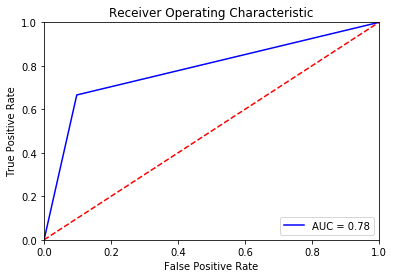

In [406]:
classifier=Sequential()
classifier.add(Dense(6,init='uniform',activation='relu',input_dim=5))
classifier.add(Dense(6,init='uniform',activation='relu'))
classifier.add(Dense(1,init='uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(xlr_train,ylr_train,epochs=50)
yys_hat=classifier.predict(xlr_test)
yys_hat=(yys_hat>0.5)

print(confusion_matrix(ylr_test,yys_hat))

fpr, tpr, threshold = metrics.roc_curve(ylr_test, yys_hat);
roc_auc = metrics.auc(fpr, tpr);

plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right');
plt.plot([0, 1], [0, 1],'r--');
plt.xlim([0, 1]);
plt.ylim([0, 1]);
plt.ylabel('True Positive Rate');
plt.xlabel('False Positive Rate');



In [160]:
from sklearn.model_selection import KFold

In [161]:
kf = KFold(n_splits=5)
for train, test in kf.split(xlr_train):
    print("%s %s" % (train, test))

[ 6400  6401  6402 ... 31997 31998 31999] [   0    1    2 ... 6397 6398 6399]
[    0     1     2 ... 31997 31998 31999] [ 6400  6401  6402 ... 12797 12798 12799]
[    0     1     2 ... 31997 31998 31999] [12800 12801 12802 ... 19197 19198 19199]
[    0     1     2 ... 31997 31998 31999] [19200 19201 19202 ... 25597 25598 25599]
[    0     1     2 ... 25597 25598 25599] [25600 25601 25602 ... 31997 31998 31999]


In [162]:
from sklearn.model_selection import cross_val_score

In [419]:
from sklearn.metrics import accuracy_score

for clf in (lgr, cls_KN, nb_G, svc_c, rfc, dtc):
    clf.fit(xlr_train, ylr_train)
    predict = clf.predict(xlr_test)
    print(clf.__class__.__name__, accuracy_score(ylr_test, predict))

C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


LogisticRegression 0.919875
KNeighborsClassifier 0.889
GaussianNB 0.878


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC 0.928125


C:\Users\mcagr\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier 0.875625
DecisionTreeClassifier 0.848625


In [163]:
accrcy = cross_val_score(estimator = lgr, X = xlr_train, y = ylr_train, cv = 5);
print('LOG-REG - accuracy mean % :', accrcy.mean()*100);
print('LOG-REG - Std % : ', accrcy.std()*100);

accrcy = cross_val_score(estimator = cls_KN, X = xlr_train, y = ylr_train, cv = 5);
print('KN - accuracy mean % :', accrcy.mean()*100);
print('KN - Std % : ', accrcy.std()*100);

accrcy = cross_val_score(estimator = nb_G, X = xlr_train, y = ylr_train, cv = 5);
print('NB_G - accuracy mean % :', accrcy.mean()*100);
print('NB_G - Std % : ', accrcy.std()*100);

accrcy = cross_val_score(estimator = svc_c, X = xlr_train, y = ylr_train, cv = 5);
print('SVM - accuracy mean % :', accrcy.mean()*100);
print('SVM - Std % : ', accrcy.std()*100);

accrcy = cross_val_score(estimator = rfc, X = xlr_train, y = ylr_train, cv = 5);
print('R_F - accuracy mean % :', accrcy.mean()*100);
print('R_F - Std % : ', accrcy.std()*100);

accrcy = cross_val_score(estimator = dtc, X = xlr_train, y = ylr_train, cv = 5);
print('D_T - accuracy mean % :', accrcy.mean()*100);
print('D_T - std % : ', accrcy.std()*100);


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LOG-REG - accuracy mean % : 93.203125
LOG-REG - Std % :  0.1222350450975489


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y

KN - accuracy mean % : 92.60312499999999
KN - Std % :  0.32046109358235475
NB_G - accuracy mean % : 93.10625
NB_G - Std % :  0.22303832350069383


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

SVM - accuracy mean % : 92.746875
SVM - Std % :  0.006249999999998756


C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mcagr\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

R_F - accuracy mean % : 92.1375
R_F - Std % :  0.3459305837158678
D_T - accuracy mean % : 90.83125000000001
D_T - std % :  0.14967412518535167


As a conclusion we can choose: <br> 
**1.**Logistic Regression: <br>***Mean Accuracy : 93,20***<br> ***AUC           : 0,75***<br>
**2.**NB_G : <br> ***Mean Accuracy : 93,10***<br> ***AUC           : 0,79***<br>


#### RESULT :

***Logistic Regression Model will be the best fit for the prediction!***<br>


<br>**Age:** For the next campaign company should focus on the retired-student groups more than others and start a campaign think about calling  the retired people maybe more to explain better and campaign maker should find a way to explain elders better.<br>
<br>**Job:** The potential customers are students and retired people. In addition on the phone if consultant explains that is a short term investment retired group will be interested in term deposit .<br>
<br>**Education:** For the educational side of the campaign, company should focus on the low-educational-level customers and should explain it's short-term functionality.<br>
<br>**Duration:** Duration is a very important key because of annpying people if it not suitable for its purpose. Especially, the call-center consultant must be very clear and understandable that's why the campaign should start from inside. That means better communication. If call-center can do that, duration will be shorter and it will effect the performans of the call-center and they can have chance to finding new customers.<br>
<br>**Default & Housing:** Default and housing might be bad. But there is a possibility that they can save   small amounts of their income for their housing monthly payment. This idea might be possibility to reaching out the customer for selling.<br>
<br>**month:** People, in general, save part of their income to buy new things(home,car,bike,... etc.) or be ready for the seasonal activities or any other reason. Here we can see the seasonal affect on the term deposit. That's why the company should prepare any other special offers or different reason to be a part of this campaign.<br>

<br>In conclusion company should tend to more effective variables than the other to be successful. And Company should simplify the strategies depends on the situations. 

